In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error
import librosa
import librosa.display
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tqdm.auto import tqdm
import scipy
from sklearn.preprocessing import PolynomialFeatures
import warnings

## Problem Overview

In [50]:
X_all = pd.read_csv('development.csv')
X_test = pd.read_csv('evaluation.csv')
X_all[:20]

,Id,sampling_rate,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
0,0,22050,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,1,22050,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,2,22050,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,3,22050,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,4,22050,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav
5,5,22050,33.0,female,italian,1258.52160,3998.8406,145.61612,0.025642,0.093994,0.014001,0.152036,2350.747577,[123.046875],-93.453230,69,281,21,19.597642,audios_development/6.wav
6,6,22050,18.0,male,french,1789.02590,3999.5728,145.42523,0.022059,0.138322,0.001402,0.177713,2771.793237,[92.28515625],-132.864988,69,281,29,21.849977,audios_development/7.wav
7,7,22050,18.0,female,igbo,1042.95260,3989.9595,147.18710,0.013859,0.104579,0.000908,0.111858,2701.802811,[215.33203125],5.586937,4,16,1,1.367937,audios_development/8.wav
8,8,22050,18.0,female,igbo,779.33765,2927.2144,157.62047,0.013921,0.080848,0.000324,0.039097,1448.093479,[143.5546875],-43.823950,0,0,1,1.989660,audios_development/9.wav
9,9,22050,18.0,male,igbo,732.35297,3988.0715,147.95331,0.017735,0.114380,0.007425,0.073166,1722.624247,[86.1328125],-47.044540,5,22,1,1.437914,audios_development/10.wav


In [51]:
audio_files = os.listdir('audios_development')
eval_files = os.listdir('audios_evaluation')

In [52]:
durations=[]
for file in audio_files:
    if file.endswith(('.wav', '.mp3')):
        audio_path = 'audios_development/'+file
        y, sr = librosa.load(audio_path, sr=None)  # Load audio
        duration = librosa.get_duration(y=y, sr=sr)
        durations.append(duration)

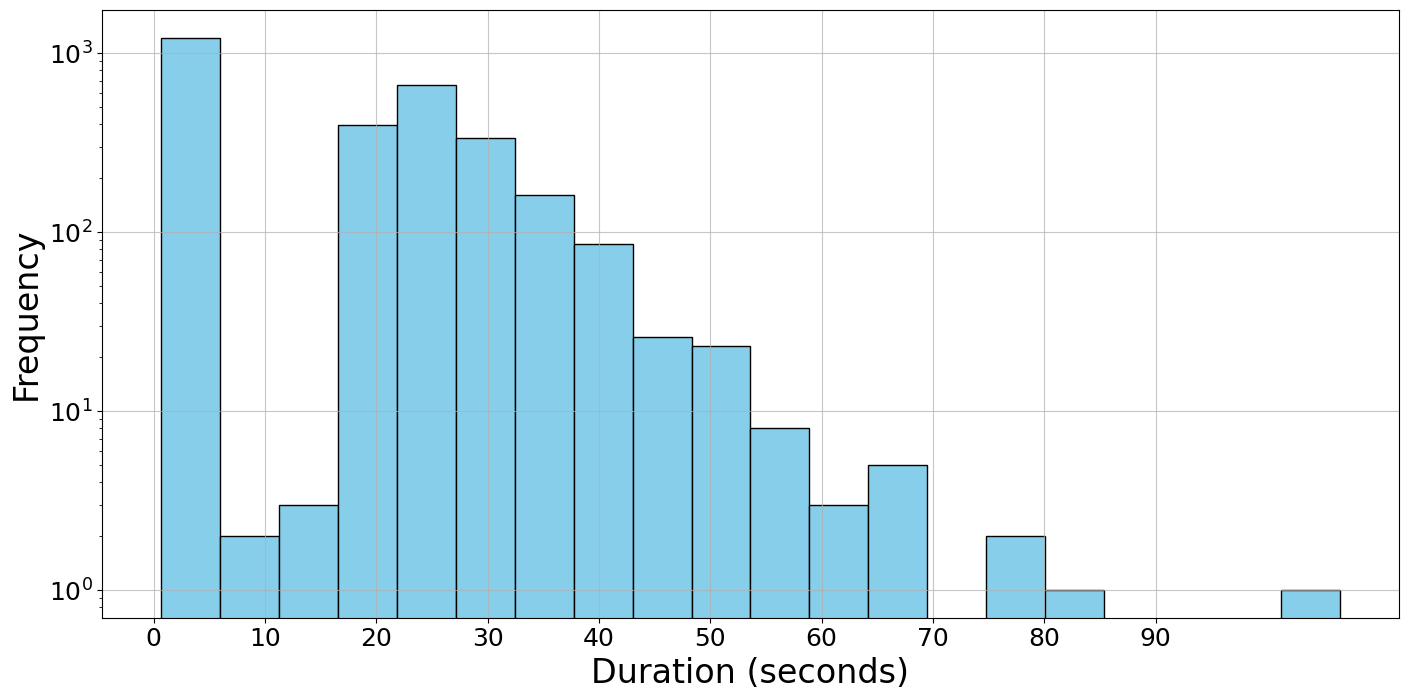

In [53]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.hist(durations, bins=20, color='skyblue', edgecolor='black')

ax.set_xlabel('Duration (seconds)', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
ax.grid(True, alpha=0.7)
ax.set_yscale('log')  # Set the y-axis to logarithmic scale
ax.set_xticks(range(0,100,10))
plt.tight_layout()
ax.tick_params(axis='x', labelsize=18) 
ax.tick_params(axis='y', labelsize=18)
plt.show()
fig.savefig("durations_distribution.pdf", bbox_inches="tight")

In [54]:
def plot_age_distribution(age):
    fig, ax = plt.subplots(figsize=(14, 7))

    # Crea l'istogramma
    ax.hist(age, bins=40, color='lightgreen', edgecolor='black')

    ax.set_xlabel('Age', fontsize=24)
    ax.set_ylabel('Frequency', fontsize=24)

    # griglia
    ax.grid(True, alpha=0.7)

    # Imposta la scala dell'asse Y come logaritmica
    ax.set_yscale('log')

    ax.set_xticks(range(0,100,5))  # Intervallo di 5 in 5

    ax.tick_params(axis='x', labelsize=18) 
    ax.tick_params(axis='y', labelsize=18)  

    # Ottimizza la disposizione
    plt.tight_layout()

    plt.show()

    fig.savefig("age_distribution.pdf", bbox_inches="tight")

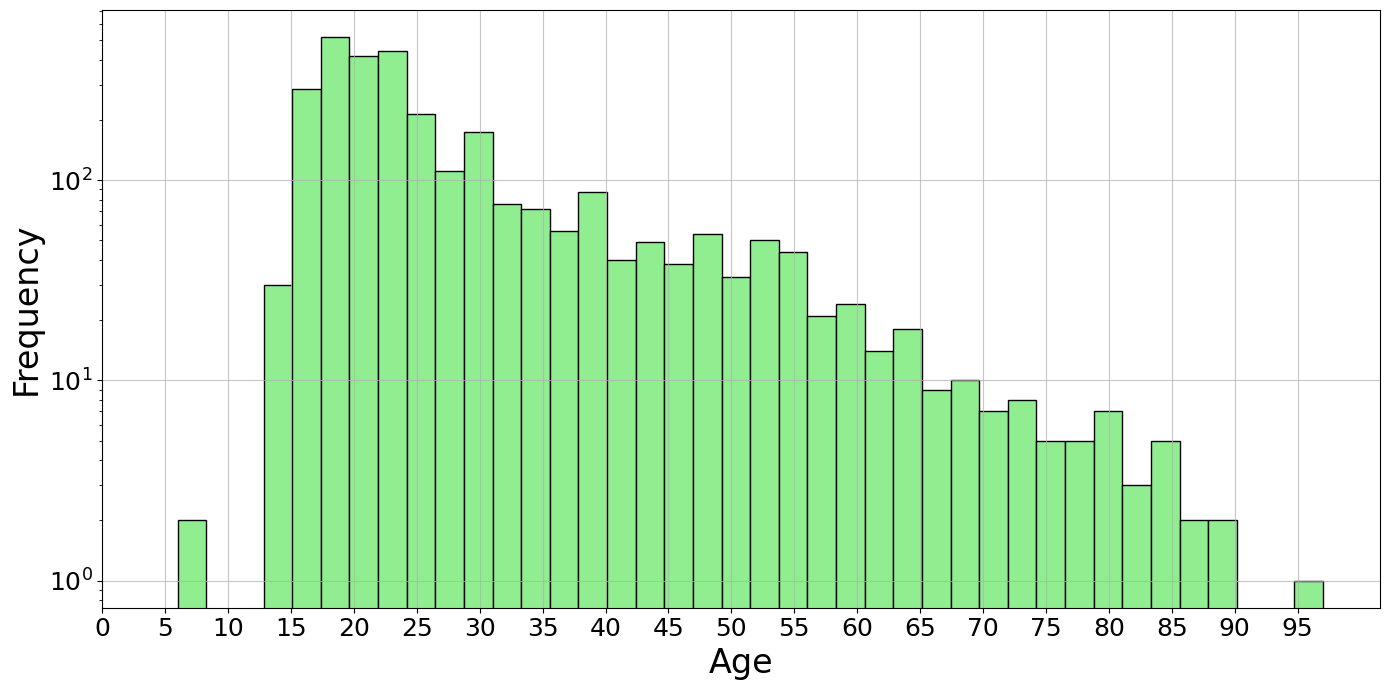

In [55]:
plot_age_distribution(X_all["age"])

In [56]:
def plot_audio_time_domain(audio_file, folder, output_file="audio_waveform.pdf"):
    try:
        y, sr = librosa.load(folder + '/' + audio_file, sr=None)
        
        time = librosa.times_like(y, sr=sr)
        
        modified_time = (time * 2) / 1000
        
        modified_amplitude = y * 10000
        
        fig, ax = plt.subplots(figsize=(14, 7))
        
        ax.plot(modified_time, modified_amplitude, color='b', linewidth=1)
        
        ax.set_xlabel("Time (s)", fontsize=24)
        ax.set_ylabel("Amplitude", fontsize=24)
        
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.grid(True, alpha=0.5, linestyle='--')
        
        plt.tight_layout()
        plt.savefig(output_file, bbox_inches="tight")
        plt.show()
    
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")


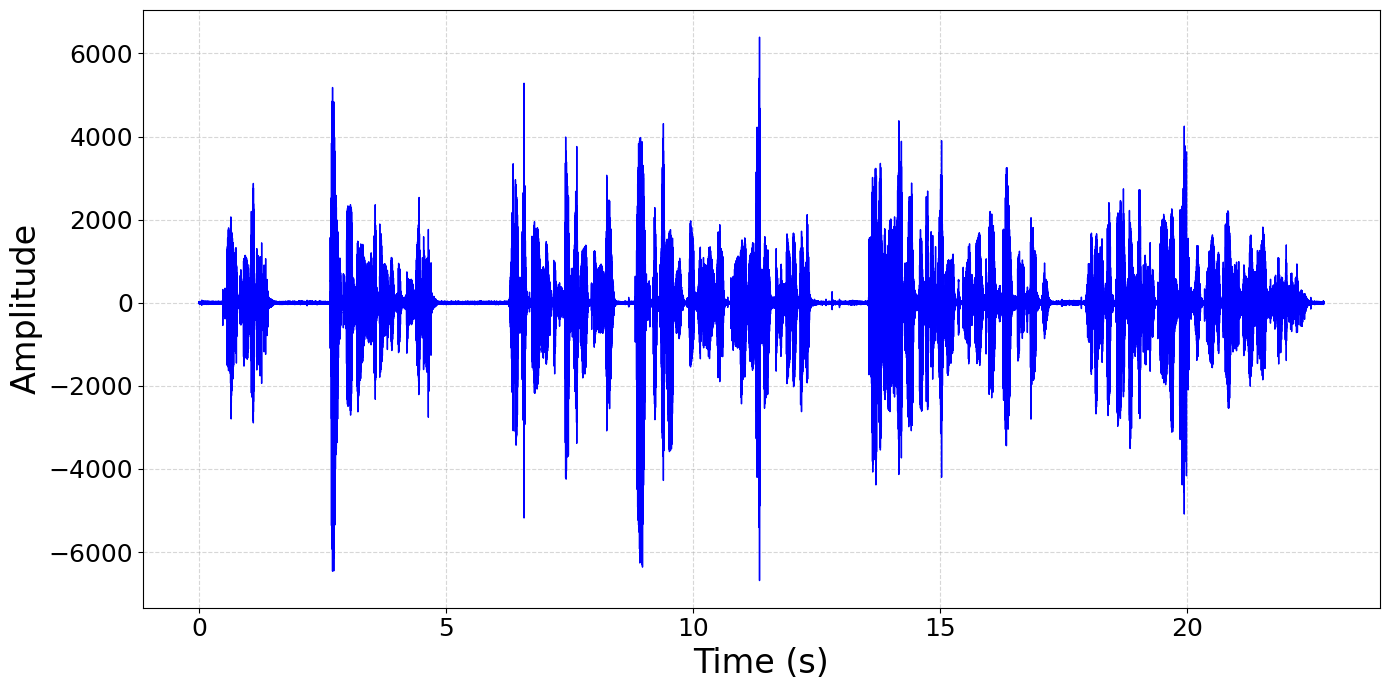

In [57]:
plot_audio_time_domain('1890.wav', 'audios_development')

In [58]:
def plot_audio_spectrogram(audio_path, n_mels=40, output_file="mel_spectrogram.pdf"):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        
        fig, ax = plt.subplots(figsize=(14, 7))
        
        img = librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB', label='Amplitude (dB)')
        
        ax.set_xlabel('Time (seconds)', fontsize=24)
        ax.set_ylabel('Frequency (Mel scale)', fontsize=24)
        
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.grid(True, alpha=0.7, linestyle='--')
        
        plt.tight_layout()
        plt.savefig(output_file, bbox_inches="tight")
        plt.show()
        print(f"Spectrogram saved as {output_file}")
    
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

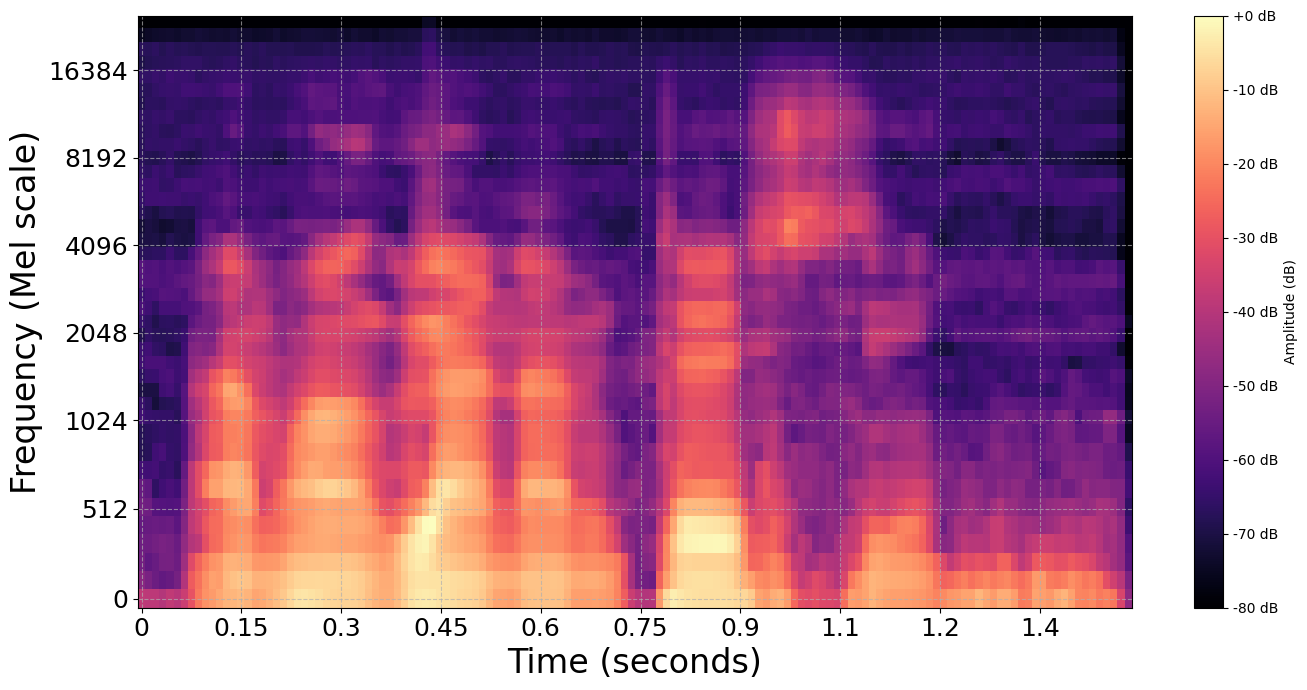

Spectrogram saved as mel_spectrogram.pdf


In [59]:
plot_audio_spectrogram('audios_development/10.wav')

## Preprocessing

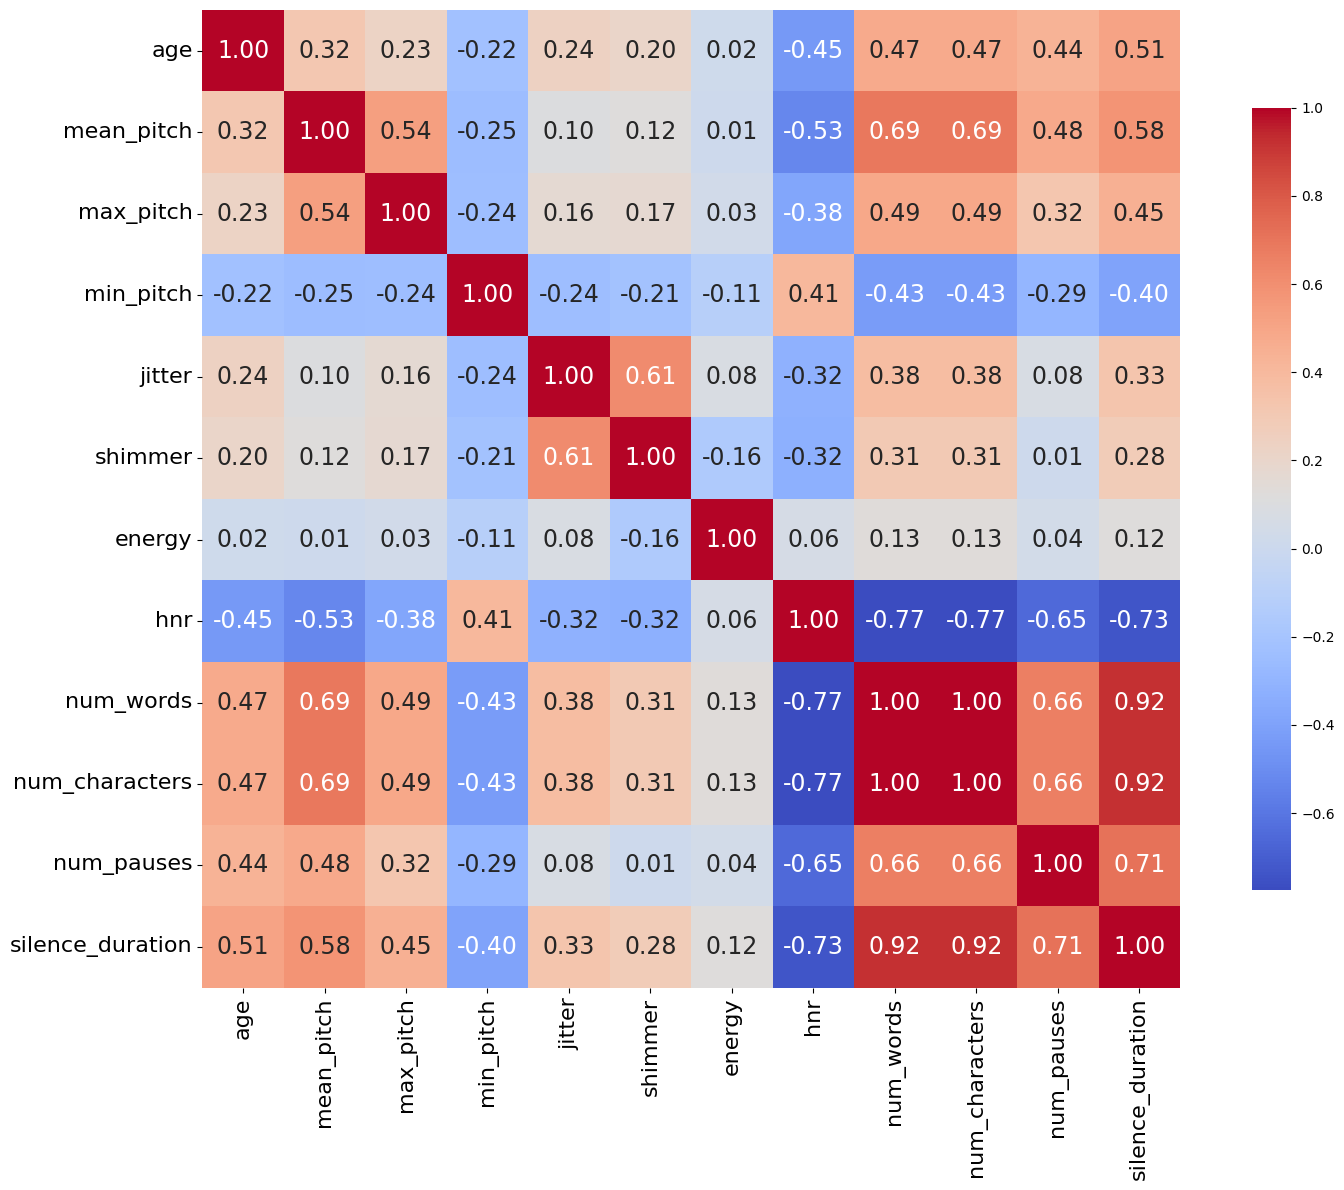

In [60]:
X_corr = X_all.drop(columns=['ethnicity', 'tempo', 'path', 'Id', 'sampling_rate', 'zcr_mean', 'spectral_centroid_mean', 'gender'])
correlation_matrix = X_corr.corr()

fig, ax = plt.subplots(figsize=(16, 12))

# Create the heatmap on the provided axis
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    ax=ax,
    annot_kws={"size": 17}  
)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

fig.tight_layout()

# Show the plot
plt.savefig("correlation_matrix.pdf", bbox_inches="tight")

plt.show()

In [61]:
X_all = X_all.drop(columns=['Id', 'sampling_rate', 'num_words', 'num_characters', 'tempo', 'energy'])
X_test = X_test.drop(columns=['Id', 'sampling_rate','num_words', 'num_characters', 'tempo', 'energy'])

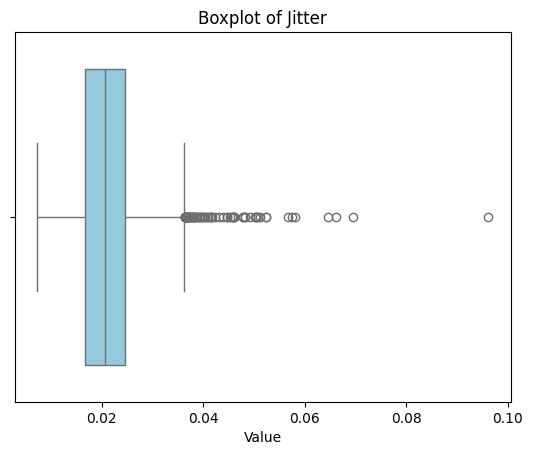

In [62]:
# Boxplot to spot the outliers.
sns.boxplot(x=X_all['jitter'], color="skyblue")
plt.title('Boxplot of Jitter')
plt.xlabel('Value')
plt.show()

In [63]:
y = X_all['age']
y.head()

0    24.0
1    22.5
2    22.0
3    22.0
4    22.0
Name: age, dtype: float64

In [64]:
X = X_all.drop(columns=['age'])
X.head()

,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,zcr_mean,spectral_centroid_mean,hnr,num_pauses,silence_duration,path
0,female,arabic,1821.6906,3999.7170,145.43066,0.013795,0.082725,0.210093,3112.257251,-123.999726,39,23.846893,audios_development/1.wav
1,female,hungarian,1297.8187,3998.8590,145.37268,0.025349,0.096242,0.078849,1688.016389,-86.928478,21,19.388662,audios_development/2.wav
2,female,portuguese,1332.8524,3998.8025,145.42395,0.019067,0.119456,0.105365,2576.901706,-98.450670,1,21.640998,audios_development/3.wav
3,female,english,1430.3499,3998.4510,147.98083,0.017004,0.102389,0.173701,3269.751413,-56.459762,9,19.644127,audios_development/4.wav
4,male,dutch,1688.7234,3998.6113,145.44772,0.028027,0.124831,0.107279,1930.897375,-80.349204,11,18.041905,audios_development/5.wav


In [65]:
X_test['gender'] = X_test['gender'].replace('famale', 'female')

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Applica il label encoding alla colonna
X['gender'] = label_encoder.fit_transform(X['gender'])
label_enc = LabelEncoder()
X_test['gender'] = label_enc.fit_transform(X_test['gender'])

In [66]:
print(f"There are {X.isna().sum().sum()} missing values in our dataframe.")
print(f"The number of rows containing at least one missing value is {X.isna().any(axis=1).sum()}.")

print(f"There are {X_test.isna().sum().sum()} missing values in our dataframe.")
print(f"The number of rows containing at least one missing value is {X_test.isna().any(axis=1).sum()}.")

There are 0 missing values in our dataframe.
The number of rows containing at least one missing value is 0.
There are 0 missing values in our dataframe.
The number of rows containing at least one missing value is 0.


In [67]:
def align_dummy_columns(X, X_test, column_name):
    # Apply get_dummies to both datasets
    X = pd.get_dummies(X, columns=[column_name], dtype=float)
    X_test = pd.get_dummies(X_test, columns=[column_name], dtype=float)
    
    # Get all possible dummy columns from both datasets
    all_columns = set(X.columns).union(set(X_test.columns))
    
    X = X.reindex(columns=sorted(all_columns), fill_value=0)
    X_test = X_test.reindex(columns=sorted(all_columns), fill_value=0)
    
    return X, X_test


In [68]:
X, X_test = align_dummy_columns(X, X_test, 'ethnicity')
X.shape

(2933, 233)

In [69]:
# Step 1: Define the threshold
threshold = 105 # Minimum number of '1's a feature must have to be kept

# Step 2: Compute the sum of '1's for each ethnicity feature
ethnicity_columns = [col for col in X.columns if col.startswith("ethnicity_")]
ethnicity_counts = X[ethnicity_columns].sum()

# Step 3: Identify features to drop
features_to_drop = ethnicity_counts[ethnicity_counts < threshold].index.tolist()
print(len(features_to_drop))

# Step 4: Drop features with too few '1's
X = X.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

# Optional: Print removed features
print(f"Removed features: {features_to_drop}")
print(X.shape)
print(X_test.shape)

219
Removed features: ['ethnicity_afemai', 'ethnicity_agni', 'ethnicity_akan', 'ethnicity_albanian', 'ethnicity_amazigh', 'ethnicity_amharic', 'ethnicity_annang', 'ethnicity_arabic', 'ethnicity_armenian', 'ethnicity_ashanti', 'ethnicity_azerbaijani', 'ethnicity_bafang', 'ethnicity_baga', 'ethnicity_bai', 'ethnicity_bambara', 'ethnicity_bamun', 'ethnicity_bari', 'ethnicity_basque', 'ethnicity_bavarian', 'ethnicity_belarusan', 'ethnicity_bengali', 'ethnicity_bosnian', 'ethnicity_bulgarian', 'ethnicity_burmese', 'ethnicity_cameroonian', 'ethnicity_cantonese', 'ethnicity_carolinian', 'ethnicity_catalan', 'ethnicity_cebuano', 'ethnicity_chaldean', 'ethnicity_chamorro', 'ethnicity_chichewa', 'ethnicity_chittagonian', 'ethnicity_congolese', 'ethnicity_croatian', 'ethnicity_czech', 'ethnicity_danish', 'ethnicity_dari', 'ethnicity_dinka', 'ethnicity_dutch', 'ethnicity_ebira', 'ethnicity_edo', 'ethnicity_ekoi', 'ethnicity_estonian', 'ethnicity_ewe', 'ethnicity_fang', 'ethnicity_fanti', 'ethnicit

### Feature Extraction

In [70]:
# we remove also the igbo ethnicity since it is not correlated with the age of the person.
X = X.drop(columns=['ethnicity_igbo'])
X_test = X_test.drop(columns=['ethnicity_igbo'])

In [71]:
warnings.filterwarnings("ignore", category=UserWarning)
def extract_audio_features(audio_files, folder):
    feature_list = []
    for audio_file in tqdm(audio_files):
        y, sr = librosa.load(folder+ '/' + audio_file, sr=None)
        features = {'path': folder + '/' + audio_file}
        
        # MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs

        mfcc_means = np.mean(mfccs, axis=1) # mean
        mfcc_stds = np.std(mfccs, axis=1) # standard deviation

        for i in range(13):
            features[f'mfcc_{i+1}_mean'] = mfcc_means[i]
            features[f'mfcc_{i+1}_std'] = mfcc_stds[i]

        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        for i, band in enumerate(spectral_contrast):
            features[f'spectral_contrast_band_{i+1}_mean'] = np.mean(band)
            features[f'spectral_contrast_band_{i+1}_std'] = np.std(band)

        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        features['bandwidth_mean'] = np.mean(bandwidth)
        features['bandwidth_std'] = np.std(bandwidth)
        features['bandwidth_max'] = np.max(bandwidth)

        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        features['onset_strength_mean'] = np.mean(onset_env)
        features['onset_strength_std'] = np.std(onset_env)

        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        features['beat_frames'] = len(beat_frames)

        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        tonnetz_means = np.mean(tonnetz, axis=1)  # Mean for each of the 6 Tonnetz components

        for i in range(6):
            features[f'tonnetz_{i+1}_mean'] = tonnetz_means[i]

        autocorr = librosa.core.autocorrelate(y)
        features['autocorr_range'] = np.max(autocorr) - np.min(autocorr)

        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)  # 12 values
        chroma_std = np.std(chroma, axis=1)

        for i in range(12):
            features[f'chroma_{i+1}_mean'] = chroma_mean[i]
            features[f'chroma_{i+1}_std'] = chroma_std[i]

        spectral_flatness = librosa.feature.spectral_flatness(y=y)
        features['spectral_flatness_mean'] = np.mean(spectral_flatness, axis=1)
        features['spectral_flatness_skewness'] = scipy.stats.skew(spectral_flatness, axis=1).mean()

        # we take the first 10 mel bands of the mel spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=10)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

        mel_means = np.mean(log_spectrogram, axis=1)
        mel_stds = np.std(log_spectrogram, axis=1)

        for i in range(10):
            features[f'mel_band_{i+1}_mean'] = mel_means[i]
            features[f'mel_band_{i+1}_std'] = mel_stds[i]


        feature_list.append(features)
        

    # Convert the list of feature dictionaries into a DataFrame
    features_df = pd.DataFrame(feature_list)
    return features_df

In [72]:
features = extract_audio_features(audio_files, 'audios_development')

100%|██████████| 2933/2933 [16:05<00:00,  3.04it/s]


In [73]:
features_eval = extract_audio_features(eval_files, 'audios_evaluation')

100%|██████████| 691/691 [04:17<00:00,  2.69it/s]


In [74]:
X = pd.merge(X, features, on='path')
X_test = pd.merge(X_test, features_eval, on='path')
X = X.drop(columns=['path'])
X_test = X_test.drop(columns=['path'])

## Hyperparameters Tuning

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial features (degree will be a hyperparameter)
    ('scaler', MinMaxScaler()),    # Standardization of features
    ('ridge', Ridge())               # Lasso regression (alpha will be a hyperparameter)
])

param_grid = {
    'poly__degree': [1, 2, 3],    # polynomial degrees
    'ridge__alpha': [0.5, 1.0, 2.0, 3.0, 4.0, 5.0],
    'ridge__max_iter': [500, 1000, 2500]  # regularization strengths
}

# Create the GridSearchCV object
grid_search_ridge = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use MSE as the scoring metric
)

# Fit the grid search on the training data
grid_search_ridge.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search_ridge.best_params_)
print("Best cross-validated RMSE:", -grid_search_ridge.best_score_)

Best parameters: {'poly__degree': 2, 'ridge__alpha': 5.0, 'ridge__max_iter': 500}
Best cross-validated RMSE: 9.99508684989178


In [77]:
y_valid_pred_ridge = grid_search_ridge.predict(X_valid)
print(f"Ridge RMSE on the validation set: {root_mean_squared_error(y_valid, y_valid_pred_ridge)}")

Ridge RMSE on the validation set: 9.16262306121326


In [78]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial features (degree will be a hyperparameter)
    ('scaler', StandardScaler()),    # Standardization of features
    ('lasso', Lasso())               # Lasso regression (alpha will be a hyperparameter)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly__degree': [1, 2, 3],    # Test different polynomial degrees
    'lasso__alpha': [0.1, 0.15, 0.2, 0.5, 1.0],
    'lasso__max_iter': [500, 1000, 2500]  # Test different regularization strengths
}

# Create the GridSearchCV object
grid_search_lasso = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
)

# Fit the grid search on the training data
grid_search_lasso.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search_lasso.best_params_)
print("Best cross-validated RMSE:", -grid_search_lasso.best_score_)

Best parameters: {'lasso__alpha': 0.15, 'lasso__max_iter': 500, 'poly__degree': 2}
Best cross-validated RMSE: 10.046164857210423


In [79]:
y_valid_pred_lasso = grid_search_lasso.predict(X_valid)
print(f"Lasso RMSE on the validation set: {root_mean_squared_error(y_valid, y_valid_pred_lasso)}")

Lasso RMSE on the validation set: 9.197803476139855


In [94]:
rf_grid = {
    'n_estimators': [100, 500, 800],
    'max_depth': [50, 100, 250, None],
    'min_samples_leaf': [3, 5],
    'min_samples_split':[2, 4, 6],
    'max_features': ['sqrt','log2'],
    'n_jobs': [-1]          # Minimum samples required at each leaf node
}

rf = RandomForestRegressor(random_state=42)

rf_gs = GridSearchCV(rf, rf_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
rf_gs.fit(X_train, y_train)


# Get the best parameters and RMSE
print("Best RF parameters:", rf_gs.best_params_)
print("Best RF RMSE:", -rf_gs.best_score_)

Best RF parameters: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 800, 'n_jobs': -1}
Best RF RMSE: 10.488708693846359


In [95]:
y_valid_pred_rf = rf_gs.predict(X_valid)
print(f"Random Forest RMSE on the validation set: {root_mean_squared_error(y_valid, y_valid_pred_rf)}")

Random Forest RMSE on the validation set: 9.704764285389647


## Results

In [82]:
pipeline_ridge = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('scaler', MinMaxScaler()),  
    ('ridge', Ridge(5))               
])

pipeline_ridge.fit(X, y)
y_test_ridge = pipeline_ridge.predict(X_test)
results_sol_df = pd.DataFrame({"Id": X_test.index, "Predicted": y_test_ridge})
results_sol_df.to_csv("results_sol_ridge.csv", index=False)

In [83]:
pipeline_lasso = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('scaler', StandardScaler()),  
    ('lasso', Lasso(0.15))               
])

pipeline_lasso.fit(X, y)
y_test_lasso = pipeline_lasso.predict(X_test)
results_sol_df = pd.DataFrame({"Id": X_test.index, "Predicted": y_test_lasso})
results_sol_df.to_csv("results_sol_lasso.csv", index=False)


In [97]:
rf = RandomForestRegressor(n_estimators=800, max_depth=50, min_samples_leaf=3, min_samples_split=2, max_features='sqrt', n_jobs=-1)
rf.fit(X, y)
y_test_rf = rf.predict(X_test)
results_sol_df = pd.DataFrame({"Id": X_test.index, "Predicted": y_test_rf})
results_sol_df.to_csv("results_sol_rf.csv", index=False)

In [85]:
importances = rf.feature_importances_

# Create a DataFrame to display feature names and their corresponding importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Use X.columns if X is a DataFrame
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importances[:50])

                           Feature  Importance
9                 silence_duration    0.059944
57                     beat_frames    0.048762
50   spectral_contrast_band_7_mean    0.034098
64                  autocorr_range    0.028977
2                              hnr    0.027162
7                       num_pauses    0.024220
26                     mfcc_8_mean    0.021443
4                        max_pitch    0.021237
91                 mel_band_1_mean    0.020995
39    spectral_contrast_band_1_std    0.018749
109               mel_band_10_mean    0.015878
52                  bandwidth_mean    0.014366
110                mel_band_10_std    0.014284
107                mel_band_9_mean    0.013717
6                        min_pitch    0.013049
55             onset_strength_mean    0.012924
56              onset_strength_std    0.012676
22                     mfcc_6_mean    0.012558
32                    mfcc_11_mean    0.011948
93                 mel_band_2_mean    0.010788
38   spectral

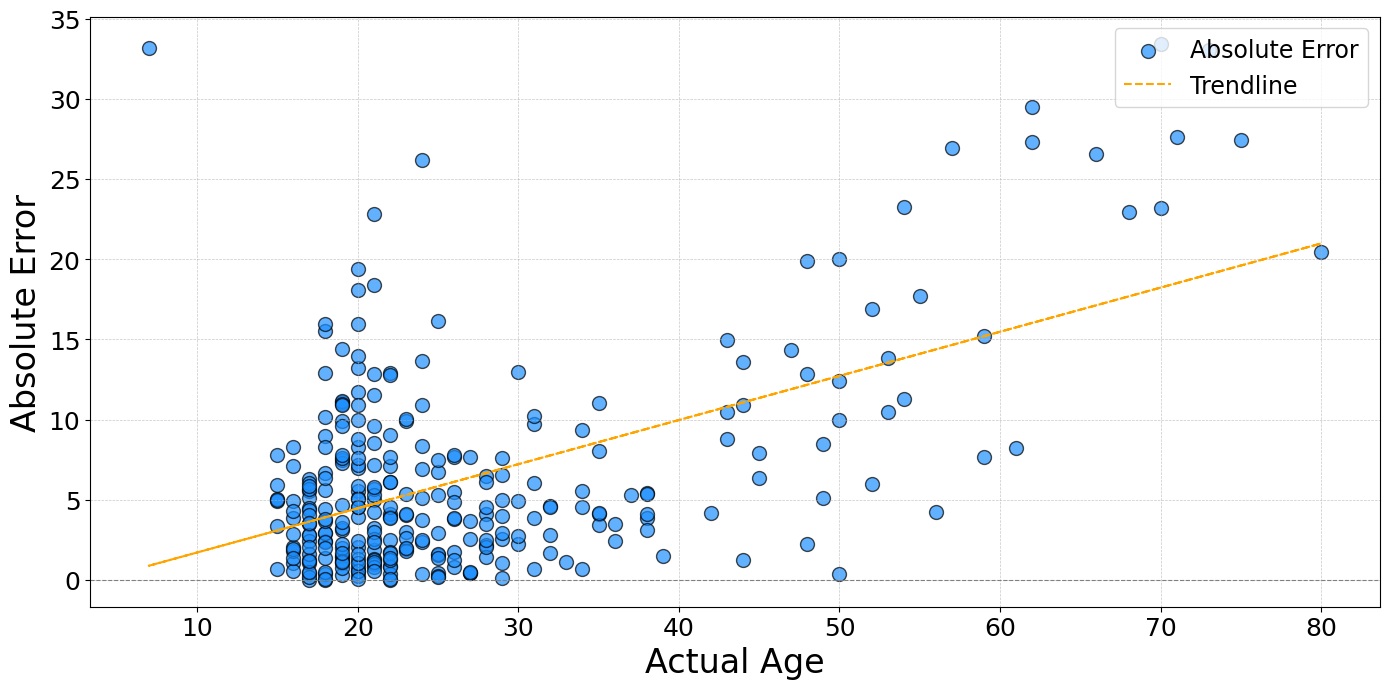

In [86]:
# Assuming y_dev and y_test_pred are defined
errors = np.abs(y_valid[0:300] - y_valid_pred_lasso[0:300])

# Plot: Errors vs. Actual Age
plt.figure(figsize=(14, 7))
plt.scatter(y_valid[:300], errors, alpha=0.7, c='dodgerblue', edgecolor='k', label="Absolute Error", s=100)

# Adding a trendline
z = np.polyfit(y_valid[:300], errors, 1)
p = np.poly1d(z)
plt.plot(y_valid[:300], p(y_valid[:300]), color='orange', linestyle='--', linewidth=1.5, label="Trendline")

# Adding horizontal and vertical gridlines
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title and labels
plt.xlabel("Actual Age", fontsize=24)
plt.ylabel("Absolute Error", fontsize=24)

# Customizing ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding legend
plt.legend(fontsize=17, loc='upper right')

# Show plot
plt.tight_layout()
plt.savefig("errors_distribution.pdf", bbox_inches="tight")

plt.show()


In [87]:
X_all_baseline = pd.read_csv('development.csv')
X_test_baseline = pd.read_csv('evaluation.csv')
y_baseline = X_all_baseline['age']
X_baseline = X_all_baseline.drop(columns=['age', 'ethnicity', 'tempo', 'gender', 'path'])
X_test_baseline = X_test_baseline.drop(columns=['ethnicity', 'tempo', 'gender', 'path'])

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_baseline, y_baseline)
y_test_baseline = lin_reg.predict(X_test_baseline)

results_sol_df = pd.DataFrame({"Id": X_test.index, "Predicted": y_test_baseline})
results_sol_df.to_csv("results_sol_lr_baseline.csv", index=False)

In [89]:
rf_base = RandomForestRegressor()
rf_base.fit(X_baseline, y_baseline)
y_test_rf_base = rf_base.predict(X_test_baseline)
results_sol_df = pd.DataFrame({"Id": X_test.index, "Predicted": y_test_rf_base})
results_sol_df.to_csv("results_sol_rf_baseline.csv", index=False)